In [60]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import copy

In [61]:
import sys
sys.path.append('../')
from models import load_pretrained
from loader import get_dataloader
from utils import batch_run, roc_btw_arr

In [62]:
device = 'cuda:3'

In [63]:
m, _ = load_pretrained('cifar_ood_oe_scratch/allconv/', 'oe_scratch_allconv.yml', 
                       'cifar10_allconv_oe_scratch_epoch_99.pt', root='../pretrained', network='allconv', num_classes=10)

In [42]:
# m, _ = load_pretrained('cifar_ood_md/md_resnet', 'md_resnet_cifar.yml', 'resnet_cifar10.pth', root='../pretrained', lr_tunned_with='SVHN_OOD')

/opt/conda/envs/evg/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegressionCV from version 0.24.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [64]:
augmentations = {
    "normalize": {
        "mean": (0.4914, 0.4822, 0.4465),
        "std": (0.2471, 0.2435, 0.2615),
    },
}

# augmentations = {
#     "normalize": {
#             "mean": (0.4914, 0.4822, 0.4465),
#             "std": (0.2023, 0.1994, 0.2010),
#     },
# }

In [65]:
size = 32; channel = 3
data_dict = {
    "path": "../datasets",
    "size": size,
    "channel": channel,
    "batch_size": 64,
    "n_workers": 4,
    "split": "evaluation",
    #              'split': 'validation',
}
data_dict["dequant"] = augmentations

In [66]:
data_dict_ = copy.copy(data_dict)
data_dict_['dataset'] = 'CIFAR10_OOD'
in_dl = get_dataloader(data_dict_)

Using No Augmentations
Using normalize aug with params {'mean': (0.4914, 0.4822, 0.4465), 'std': (0.2471, 0.2435, 0.2615)}
Files already downloaded and verified
Files already downloaded and verified


In [67]:
data_dict_ = copy.copy(data_dict)
data_dict_['dataset'] = 'SVHN_OOD'
out_dl = get_dataloader(data_dict_)

Using No Augmentations
Using normalize aug with params {'mean': (0.4914, 0.4822, 0.4465), 'std': (0.2471, 0.2435, 0.2615)}
Using downloaded and verified file: ../datasets/test_32x32.mat


In [68]:
data_dict_ = copy.copy(data_dict)
data_dict_['dataset'] = 'SVHN_OOD'
data_dict_['split'] = 'training'
out_train_dl = get_dataloader(data_dict_)

Using No Augmentations
Using normalize aug with params {'mean': (0.4914, 0.4822, 0.4465), 'std': (0.2471, 0.2435, 0.2615)}
Using downloaded and verified file: ../datasets/train_32x32.mat


In [69]:
m = m.to(device)

In [70]:
in_score = batch_run(m, in_dl, device=device, no_grad=False)
out_score = batch_run(m, out_dl, device=device, no_grad=False)

In [71]:
out_train_score = batch_run(m, out_train_dl, device=device, no_grad=False)

In [72]:
out_train_score.shape

torch.Size([65930])

In [73]:
in_score.shape

torch.Size([10000])

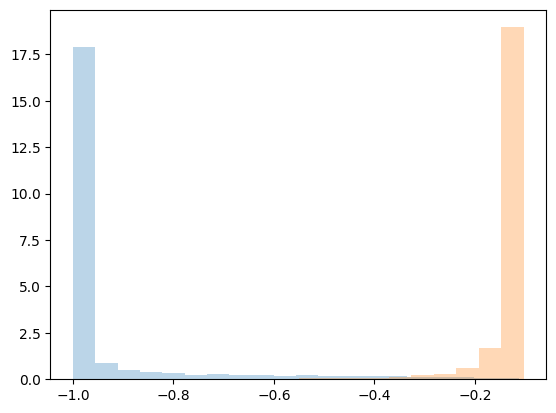

In [74]:
plt.hist(in_score.numpy(), density=True, alpha=0.3, bins=20)
plt.hist(out_score.numpy(), density=True, alpha=0.3, bins=20);

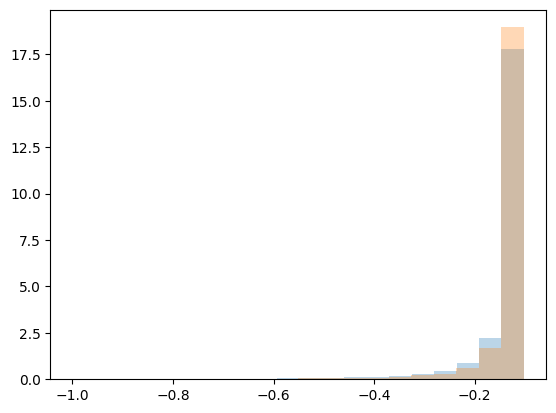

In [75]:
plt.hist(out_train_score.numpy(), density=True, alpha=0.3, bins=20)
plt.hist(out_score.numpy(), density=True, alpha=0.3, bins=20);

In [78]:
out_train_score.min()

tensor(-0.9958)

In [79]:
out_score.min()

tensor(-0.9987)